In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# transform : normalize and convert to tensor
transform  = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5),(0.5))
])

In [4]:
# Load Dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|███████████████████████████████████████████████████████████████████| 9912422/9912422 [00:03<00:00, 2657121.47it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|████████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 104199.61it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|████████████████████████████████████████████████████████████████████| 1648877/1648877 [00:15<00:00, 104235.24it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████████████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<?, ?it/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



In [5]:
# Data Loader
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

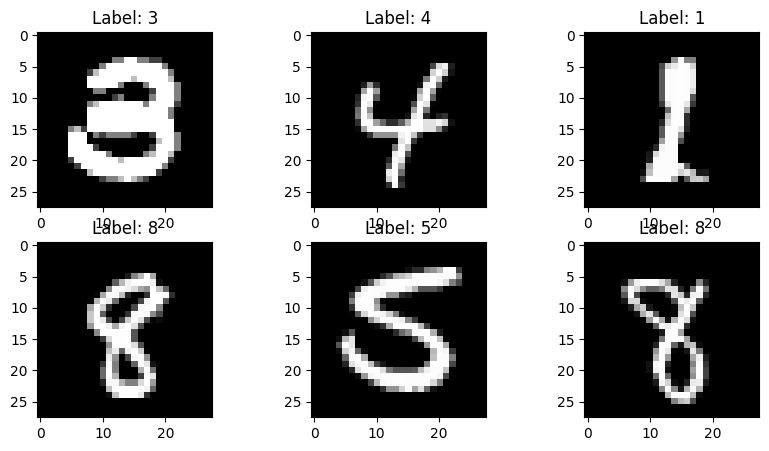

In [9]:
# visualizing dataset
examples = iter(train_loader)
images, labels  = next(examples)
plt.figure(figsize=(10,5))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i][0], cmap='gray')
    plt.title(f'Label: {labels[i].item()}')
plt.show()

### Define ANN Model

In [10]:
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)   # Input Layer
        self.fc2 = nn.Linear(128, 64)      # Hidden Layer
        self.fc3 = nn.Linear(64, 10)       # Output Layer
        self.relu = nn.ReLU()
        self.softmax = nn.LogSoftmax(dim = 1)

    def forward(self, x):
        x = x.view(-1, 28*28)   # flatten image
        x = self.relu(self.fhe c1(x))
        x = self.relu(self.fc2(x))
        x = self.softmax(self.fc3(x))
        return x

model = ANN()

### Training the Model

In [11]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

Epoch 1, Loss: 0.4009
Epoch 2, Loss: 0.1940
Epoch 3, Loss: 0.1396
Epoch 4, Loss: 0.1122
Epoch 5, Loss: 0.0948


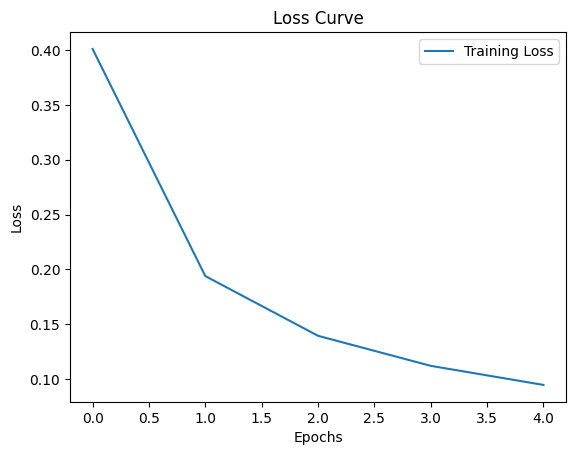

In [14]:
epochs = 5
losses = []

for epoch in range(epochs):
    total_loss = 0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    losses.append(avg_loss)
    print(f'Epoch {epoch+1}, Loss: {avg_loss:.4f}')

# Plot Training Loss
plt.plot(losses, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()
plt.show()

### Evaluating the Model

In [15]:
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy: {100 * correct / total:.2f}%')

Accuracy: 96.84%


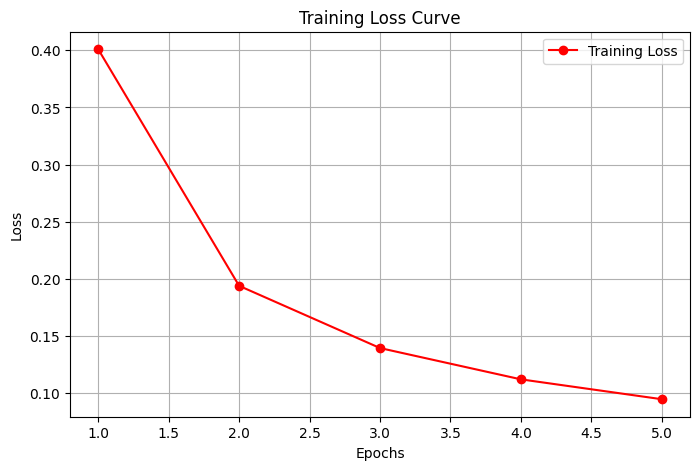

In [20]:
import matplotlib.pyplot as plt

# Plot training loss over epochs
plt.figure(figsize=(8,5))
plt.plot(range(1, len(losses)+1), losses, marker='o', linestyle='-', color='r', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.grid()
plt.show()


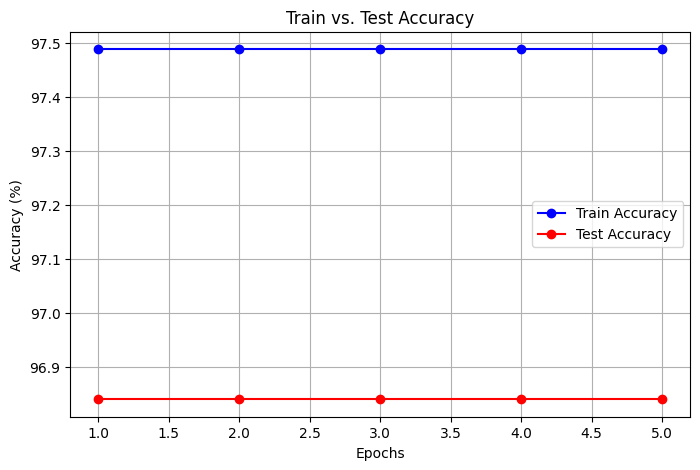

In [21]:
train_accuracies = []  # Store accuracy per epoch
test_accuracies = []   # Store test accuracy per epoch

# Compute accuracy per epoch
for epoch in range(epochs):
    correct_train = 0
    total_train = 0
    correct_test = 0
    total_test = 0

    # Training accuracy
    with torch.no_grad():
        for images, labels in train_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

    # Test accuracy
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

    train_accuracies.append(100 * correct_train / total_train)
    test_accuracies.append(100 * correct_test / total_test)

# Plot accuracy curve
plt.figure(figsize=(8,5))
plt.plot(range(1, epochs+1), train_accuracies, 'bo-', label='Train Accuracy')
plt.plot(range(1, epochs+1), test_accuracies, 'ro-', label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Train vs. Test Accuracy')
plt.legend()
plt.grid()
plt.show()


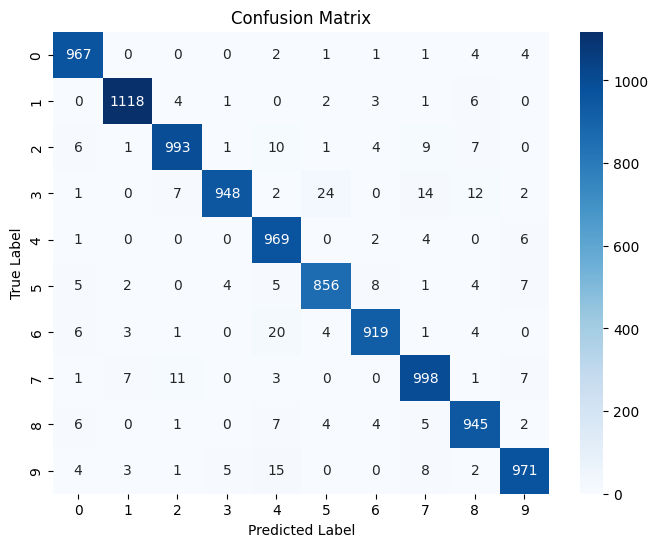

In [22]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Generate confusion matrix
y_true = []
y_pred = []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.numpy())
        y_pred.extend(predicted.numpy())

# Create confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot using seaborn
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


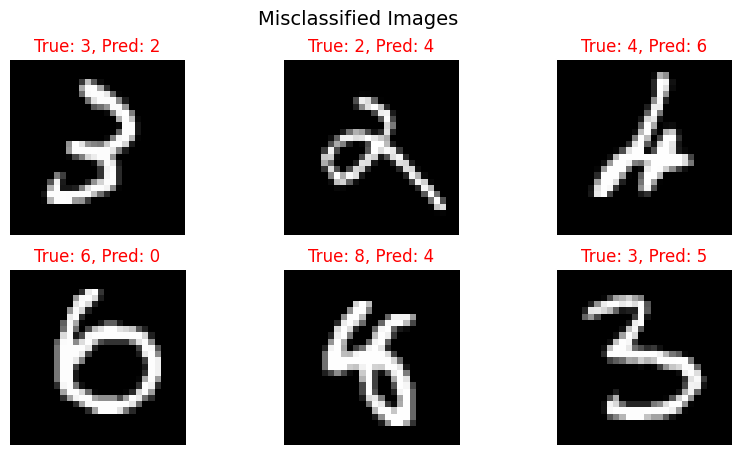

In [23]:
misclassified = []

# Get misclassified images
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        for i in range(len(labels)):
            if predicted[i] != labels[i]:
                misclassified.append((images[i], labels[i], predicted[i]))

# Display 6 misclassified images
plt.figure(figsize=(10, 5))
for i in range(6):
    img, true_label, pred_label = misclassified[i]
    img = img.squeeze().numpy()
    
    plt.subplot(2, 3, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f'True: {true_label}, Pred: {pred_label}', color='red')
    plt.axis('off')

plt.suptitle("Misclassified Images", fontsize=14)
plt.show()
